# Визуализация

In [ ]:
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np

df = pd.read_csv("japan_clusterized.csv")

def visualize_proection(df, colors):
    """Функция создания трёхмерной проекции векторов с 
    разной палитрой в зависимости от кластеризации/классификации"""
    vecs = [line.split(" ") for line in df['vector'].tolist()]
    X = np.vstack(vecs)

    # UMAP в 3D
    reducer = umap.UMAP(n_components=3, random_state=42)
    embedding = reducer.fit_transform(X)

    # Координаты обратно в датафрейм
    df['umap_x'] = embedding[:, 0]
    df['umap_y'] = embedding[:, 1]
    df['umap_z'] = embedding[:, 2]

    # Визуализация
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Закрашивается по кластерам/классам
    ax.scatter(df['umap_x'], df['umap_y'], df['umap_z'],
            c=colors, s=5, alpha=0.6)

    ax.set_title("3D UMAP проекция векторов")
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    ax.set_zlabel("UMAP 3")
    plt.tight_layout()
    plt.show()

c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Кластеры (10, 6):

c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


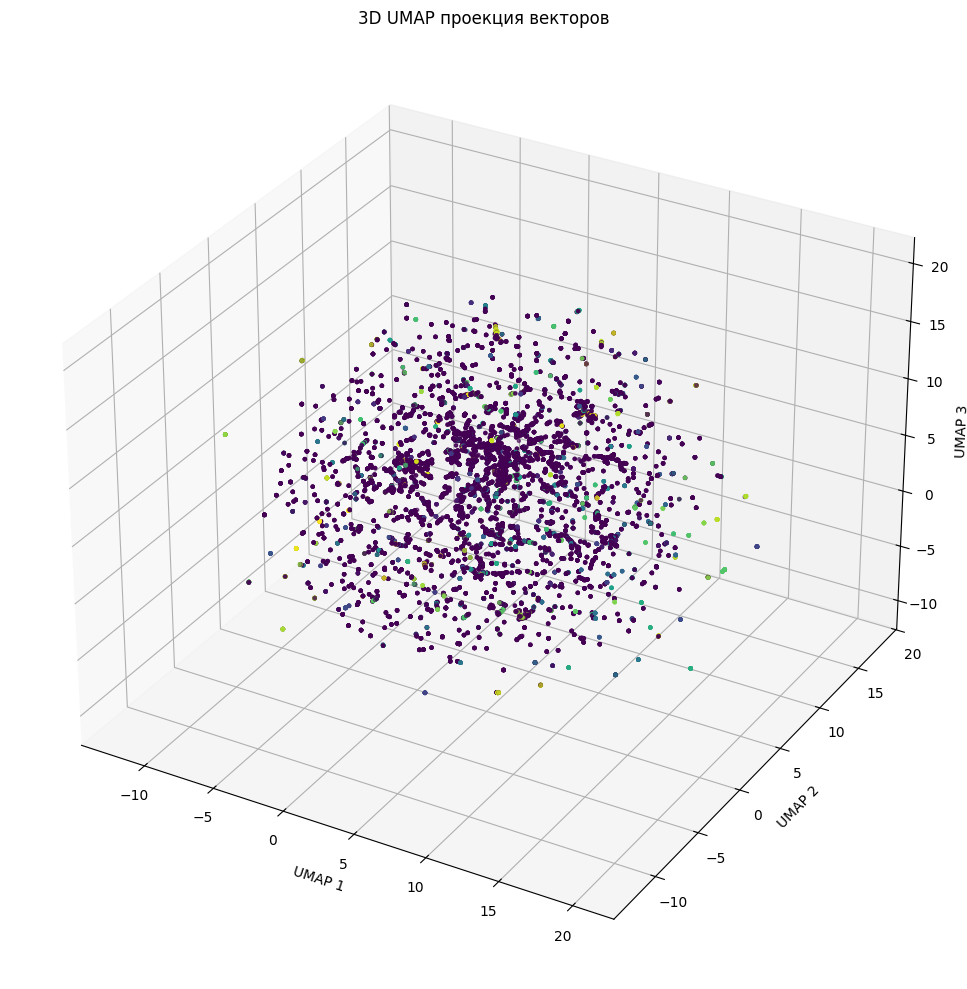

In [ ]:
visualize_proection(df, df['cluster-10-6'])

## Кластеры (20, 10):

c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter t

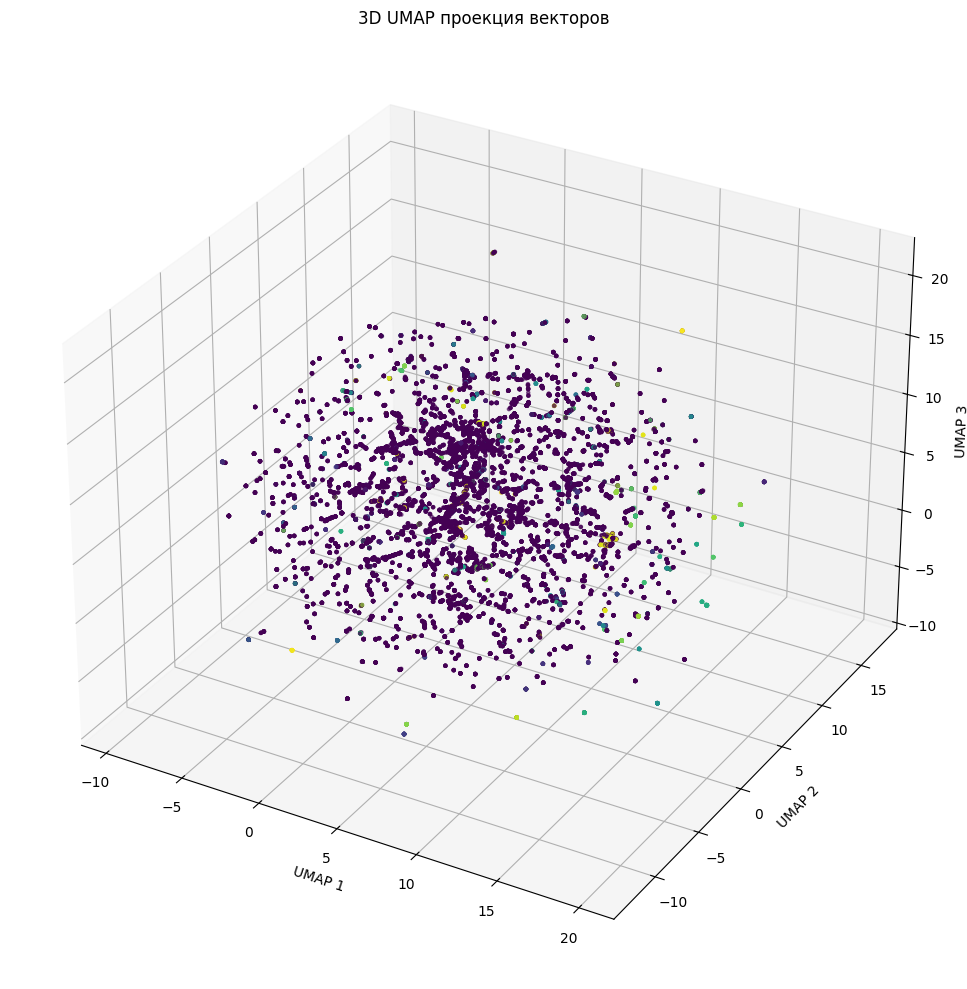

In [3]:
visualize_proection(df, df['cluster-20-10'])

## Кластеры (67, 23):

c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


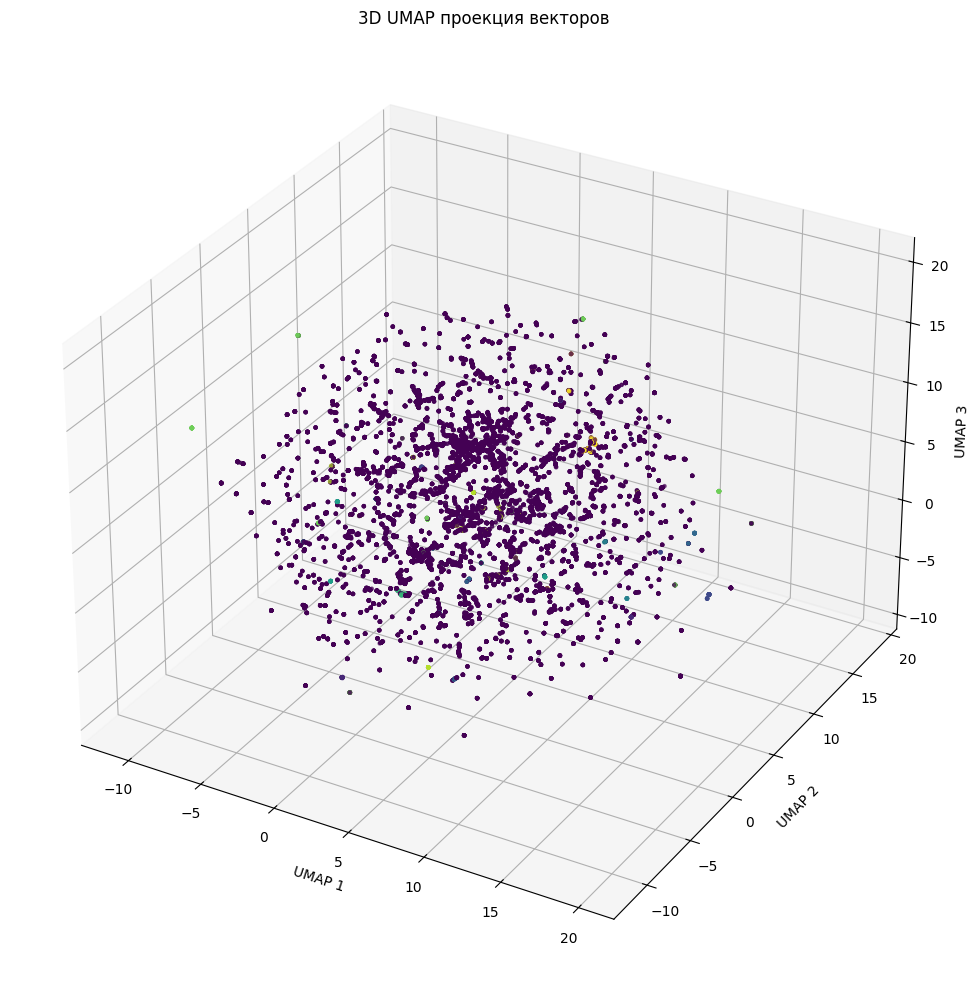

In [ ]:
visualize_proection(df, df['cluster-67-23'])

## Классы:

c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
c:\Users\Kafedo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter t

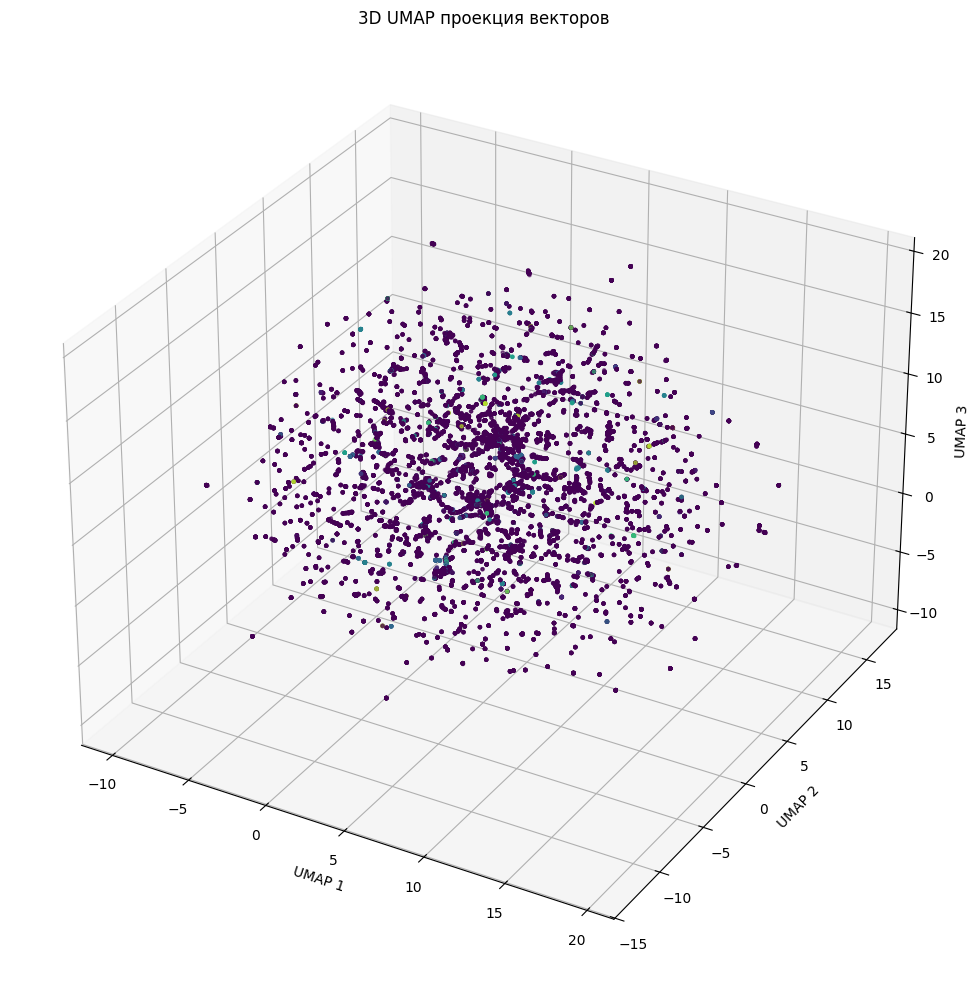

In [ ]:
colorcode = {w:i for i, w in enumerate(list(df['class_marker'].unique()))}
colors = [colorcode[x] for x in df['class_marker']]
visualize_proection(df, colors)


# Получение таблиц соответствия классов и кластеров

In [ ]:
import pandas as pd

df = pd.read_csv('japan_clusterized.csv')

def show_clasters_in_classes(params: tuple) -> dict: 
    """Функция создания словаря пересечений 
    между классами и кластерами, (ключи - имена классов)"""
    clusters = df.groupby("class_marker")
    clasclusdict = clusters[f"cluster-{params[0]}-{params[1]}"].value_counts().to_dict()

    clas_dict = {} 
    for k, v in clasclusdict.items():
        if clas_dict.get(k[0]) is None:
            clas_dict[k[0]] = [(k[1], v)]
        else:
            clas_dict[k[0]].append((k[1], v))

    for k, v in clas_dict.items():
        sortv = sorted(v, key=lambda x: x[0])
        clusts, nums = ["\t".join(map(str, item)) for item in zip(*sortv)]
        print(k, *clusts)
        print(" "*(len(k)+1), *nums)
    
    return clas_dict

illusrating_params = [(67, 23), (20, 10), (10, 6)]
for params in illusrating_params:
    print(params)
    show_clasters_in_classes(params)
    print("\n\n")